In [11]:
import numpy as np

# Your ranges
Range = 100
am_range = np.linspace(1.48, 0.79, num=Range)
an_range = np.linspace(0.70, 0.17, num=Range)

# 1. Extract the optimal alpha values based on Lagrangian logic
# We maximize am and minimize an to minimize L
alpha_m_opt = np.max(am_range)
alpha_n_opt = np.min(an_range)

# 2. Calculate the resulting L required to make dx = 0.250
# Derived from L = 0.250 / (sin(0.5*am) - sin(0.5*an))
numerator = 0.250
denominator = np.sin(0.5 * alpha_m_opt) - np.sin(0.5 * alpha_n_opt)
L_min = numerator / denominator

print(f"Optimal alpha_m: {alpha_m_opt:.6f} rad")
print(f"Optimal alpha_n: {alpha_n_opt:.6f} rad")
print(f"Minimum L required: {L_min:.6f}")

# Verification check using your dx function
def dx(L, am, an):
    return 2 * L * np.sin(0.25*(am - an)) * np.cos(0.25*(am + an))

def small_x (L,an):
    return 0.2*L+2*L*np.cos(an)



Optimal alpha_m: 1.480000 rad
Optimal alpha_n: 0.170000 rad
Minimum L required: 0.424167


In [ ]:
import numpy as np


am_min, am_max = np.radians(35), np.radians(85)
an_min, an_max = np.radians(10), np.radians(35)

# 2. Lagrangian/Optimization Logic:
# To minimize L such that dx = 0.25, we maximize the spread between am and an.
# To minimize small_x (0.2L + 2L*cos(an)), we want an to be as large as possible 
# while keeping L small. 

# Setting alpha_m to its maximum (85 deg) to minimize L
alpha_m_opt = am_max 
alpha_n_opt = an_min 

# 3. Calculate L_min using the dx = 0.250 requirement

denominator = np.sin(0.5 * alpha_m_opt) - np.sin(0.5 * alpha_n_opt)n
L_min = 0.250 / denominator

# 4. Define functions for verification
def dx(L, am, an):
    return 2 * L * np.sin(0.25*(am - an)) * np.cos(0.25*(am + an))

def small_x(L, an):
    return 0.1 * L + 2 * L * np.cos(an)

# Results
print(f"Optimal alpha_m: {np.degrees(alpha_m_opt):.2f}° ({alpha_m_opt:.4f} rad)")
print(f"Optimal alpha_n: {np.degrees(alpha_n_opt):.2f}° ({alpha_n_opt:.4f} rad)")
print(f"Minimum L: {L_min:.6f}")
print(f"Resulting small_x: {small_x(L_min, alpha_n_opt):.6f}")
print(f"Verification dx (should be 0.25): {dx(L_min, alpha_m_opt, alpha_n_opt):.4f}")

Optimal alpha_m: 85.00° (1.4835 rad)
Optimal alpha_n: 10.00° (0.1745 rad)
Minimum L: 0.424856
Resulting small_x: 0.879289
Verification dx (should be 0.25): 0.2500


In [14]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function: small_x
def objective(vars):
    L, am, an = vars
    return L * (0.2 + 2 * np.cos(an))

# Define the constraint: dx must be exactly 0.250
def constraint_dx(vars):
    L, am, an = vars
    # Simplified dx formula: L * (sin(0.5*am) - sin(0.5*an))
    return L * (np.sin(0.5 * am) - np.sin(0.5 * an)) - 0.250

# Bounds in Radians
# an: [10, 35] degrees -> [0.1745, 0.6108] rad
# am: [45, 85] degrees -> [0.7854, 1.4835] rad
bounds = [
    (0.1, 2.0),                # L range
    (np.radians(45), np.radians(85)), # alpha_m
    (np.radians(10), np.radians(35))  # alpha_n
]

# Initial guess
x0 = [0.5, np.radians(65), np.radians(20)]

# Constraint dictionary
con1 = {'type': 'eq', 'fun': constraint_dx}

# Solve
solution = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=con1)

# Extract results
L_res, am_res, an_res = solution.x

print(f"--- Optimization Results ---")
print(f"Minimum L: {L_res:.6f}")
print(f"Optimal alpha_m: {np.degrees(am_res):.2f}°")
print(f"Optimal alpha_n: {np.degrees(an_res):.2f}°")
print(f"Final small_x: {objective(solution.x):.6f}")
print(f"Constraint Check (dx): {constraint_dx(solution.x) + 0.250:.4f}")

--- Optimization Results ---
Minimum L: 0.424856
Optimal alpha_m: 85.00°
Optimal alpha_n: 10.00°
Final small_x: 0.921774
Constraint Check (dx): 0.2500


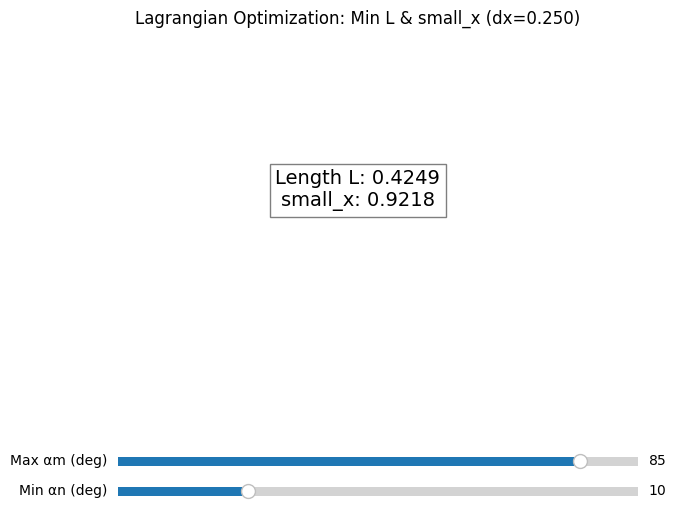

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def update_values(am_max, an_min):
    # Lagrangian Result: L = dx / (sin(0.5*am) - sin(0.5*an))
    am_rad = np.radians(am_max)
    an_rad = np.radians(an_min)
    
    L = 0.250 / (np.sin(0.5 * am_rad) - np.sin(0.5 * an_rad))
    sx = L * (0.2 + 2 * np.cos(an_rad))
    return L, sx

# Setup Plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.3)

# Initial Values
initial_am_max = 85
initial_an_min = 10
L_val, sx_val = update_values(initial_am_max, initial_an_min)

# Display Text
info_text = ax.text(0.5, 0.5, f'Length L: {L_val:.4f}\nsmall_x: {sx_val:.4f}', 
                    transform=ax.transAxes, fontsize=14, ha='center', 
                    bbox=dict(facecolor='white', alpha=0.5))
ax.set_title("Lagrangian Optimization: Min L & small_x (dx=0.250)")
ax.axis('off')

# Add Sliders
ax_am = plt.axes([0.2, 0.15, 0.65, 0.03])
ax_an = plt.axes([0.2, 0.1, 0.65, 0.03])

s_am = Slider(ax_am, 'Max αm (deg)', 45.0, 90.0, valinit=initial_am_max)
s_an = Slider(ax_an, 'Min αn (deg)', 0.0, 40.0, valinit=initial_an_min)

def update(val):
    L, sx = update_values(s_am.val, s_an.val)
    info_text.set_text(f'Optimized L: {L:.4f}\nsmall_x: {sx:.4f}\n\n'
                       f'Constraint Check:\ndx = {0.250:.3f}')
    fig.canvas.draw_idle()

s_am.on_changed(update)
s_an.on_changed(update)

plt.show()